In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
from imutils.video import FPS
import time
from PIL import Image

In [2]:
# importing the pretrained model
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe('MobileNetSSD_deploy.prototxt.txt', 'MobileNetSSD_deploy.caffemodel')
print("[INFO] model loaded...")

[INFO] loading model...
[INFO] model loaded...


In [3]:
# Defining the total classes in which model is trained
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat", 
           "bottle","bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]
# Giving random colors to each class
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [4]:
# Object detection function
def object_detection(image):
#     size of image
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    # pass the blob through the network and obtain the detections and
    # predictions
    print("[INFO] computing object detections...")
    net.setInput(blob)
    detections = net.forward()
    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence > .60:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            print("[INFO] {}".format(label))
            cv2.rectangle(image, (startX, startY), (endX, endY),
                          COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image, label, (startX, y),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return image



[INFO] computing object detections...
[INFO] dog: 89.02%
[INFO] horse: 98.20%
[INFO] person: 99.95%


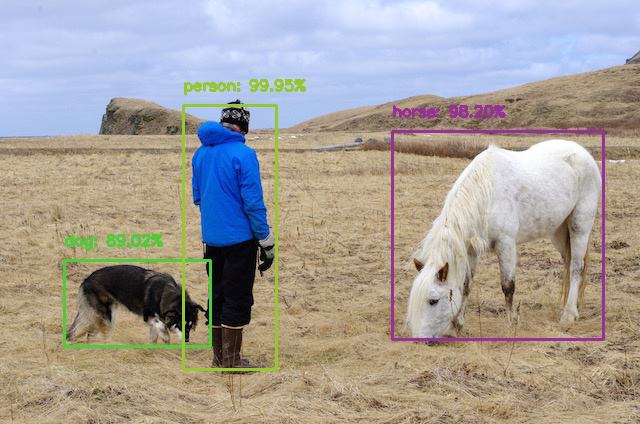

In [5]:
image=cv2.imread('testimages/sample_person.jpg')
image=object_detection(image)
# ploting image after detection
cv2.imwrite('result1.jpg',image)
Image.open('result1.jpg')

In [6]:
from IPython.display import Image,display

path=glob.glob('testimages/*jpg')


for i in path:
    image=cv2.imread(i)
    image=object_detection(image)
    cv2.imwrite('results/result'+i.split('/')[1],image)

[INFO] computing object detections...
[INFO] pottedplant: 96.45%
[INFO] pottedplant: 85.61%
[INFO] computing object detections...
[INFO] person: 99.58%
[INFO] person: 92.80%
[INFO] person: 90.33%
[INFO] person: 88.15%
[INFO] person: 79.89%
[INFO] person: 72.68%
[INFO] person: 61.23%
[INFO] computing object detections...
[INFO] dog: 89.02%
[INFO] horse: 98.20%
[INFO] person: 99.95%
[INFO] computing object detections...
[INFO] aeroplane: 99.13%
[INFO] car: 96.16%
[INFO] computing object detections...
[INFO] train: 91.39%
[INFO] computing object detections...
[INFO] bicycle: 99.98%
[INFO] bicycle: 99.93%


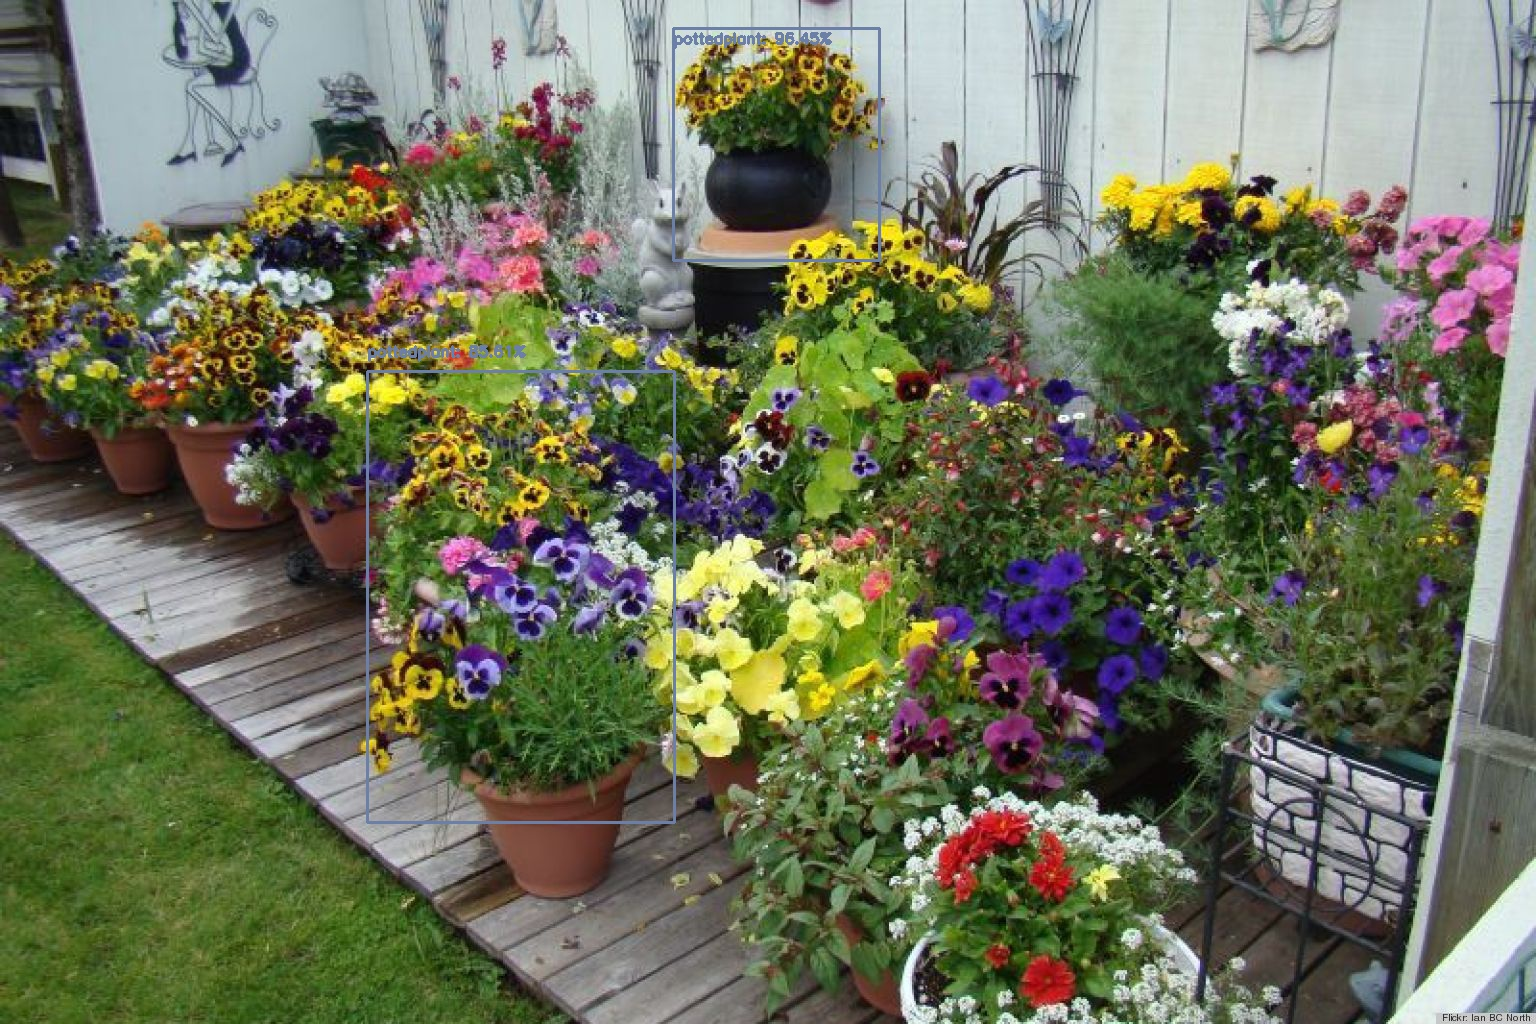

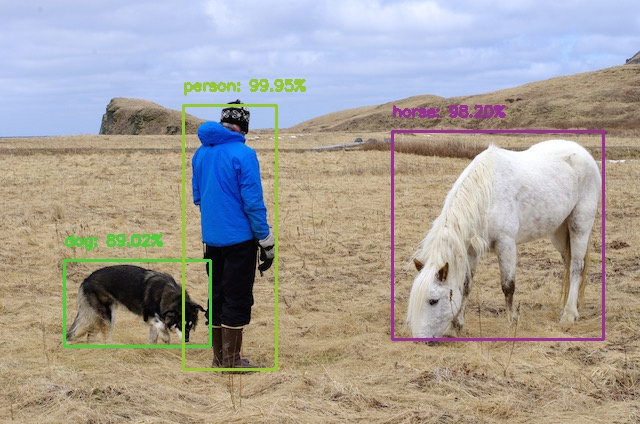

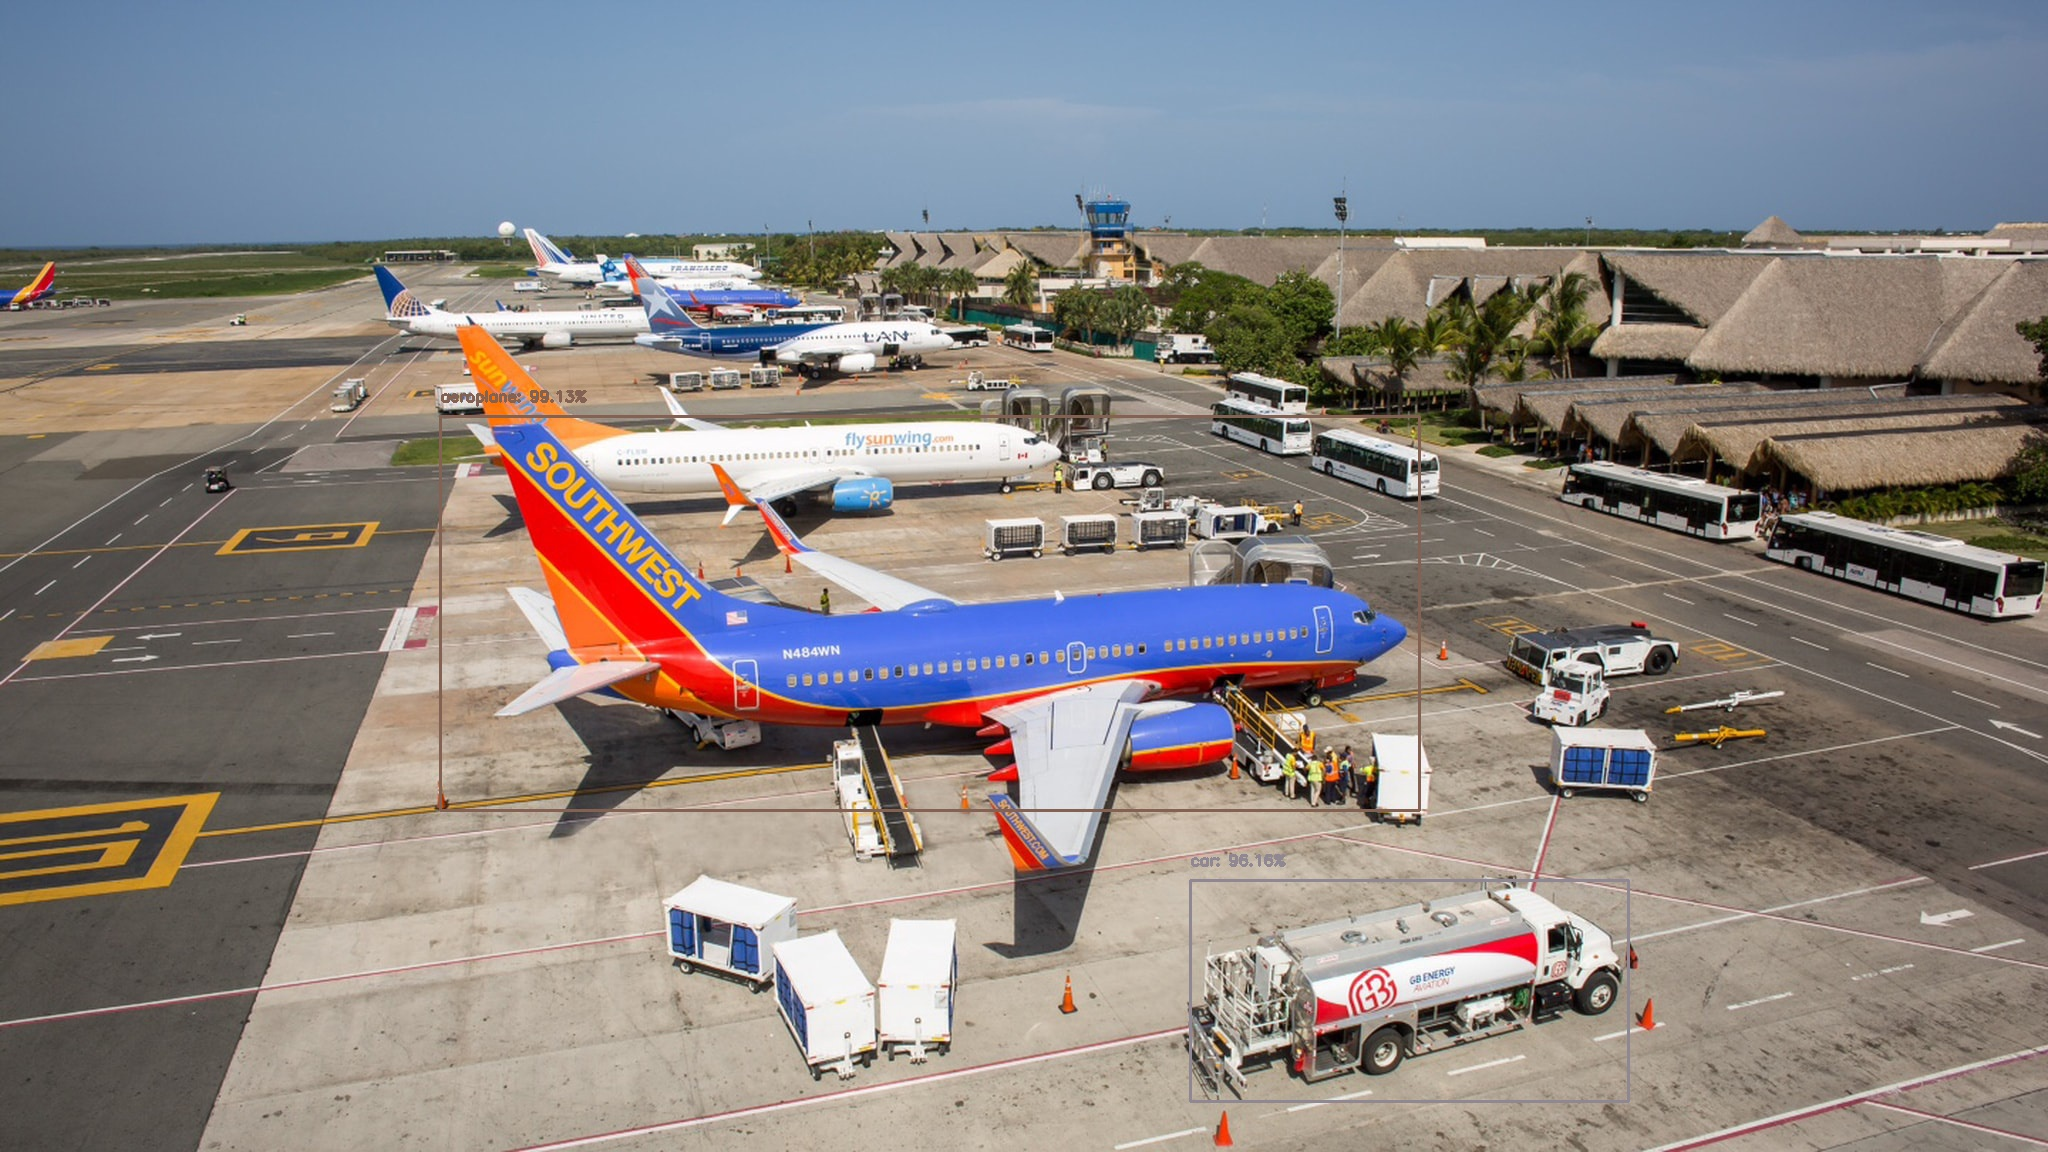

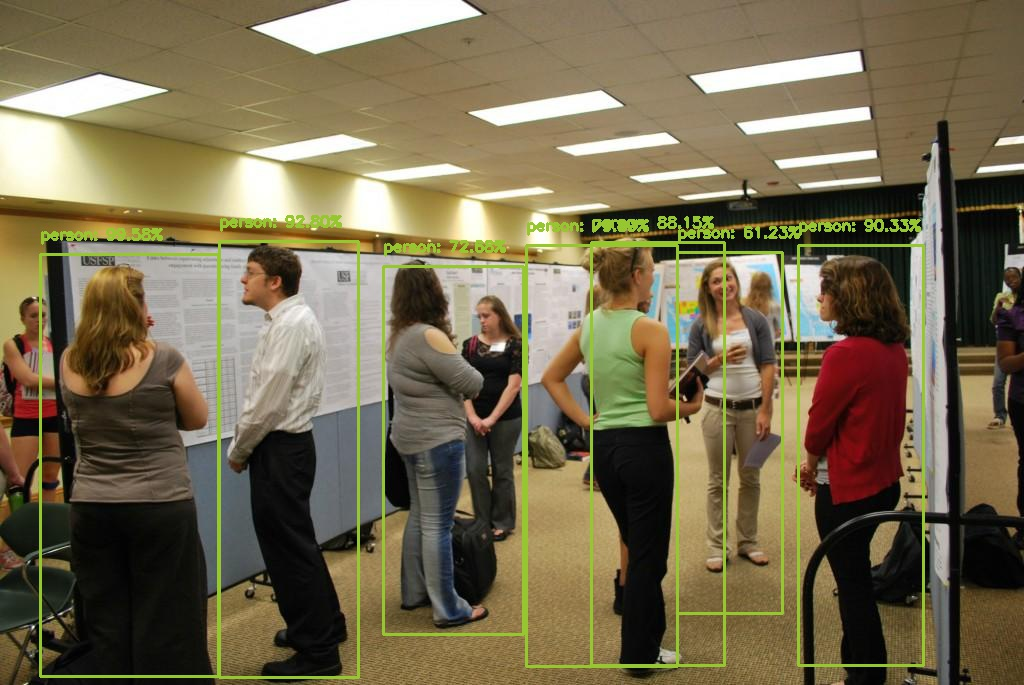

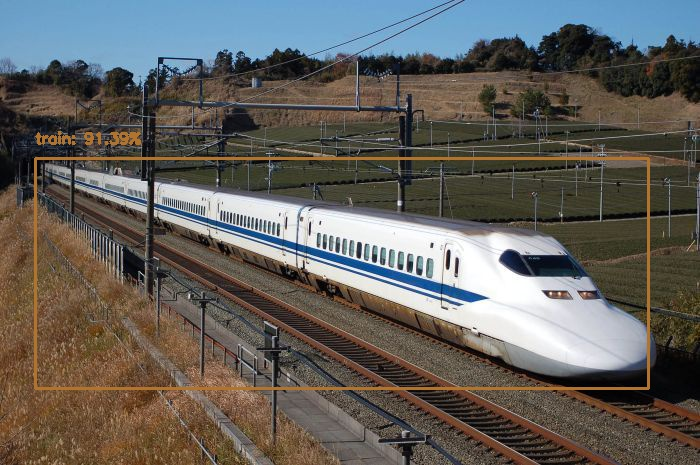

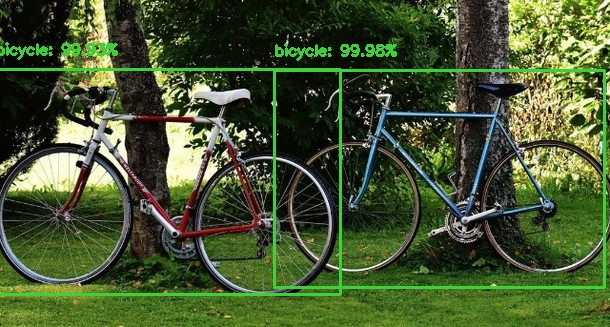

In [7]:
path=glob.glob('results//*jpg')

for i in path:
    display(Image(i))

(960, 960, 3)
[INFO] computing object detections...
[INFO] person: 99.79%


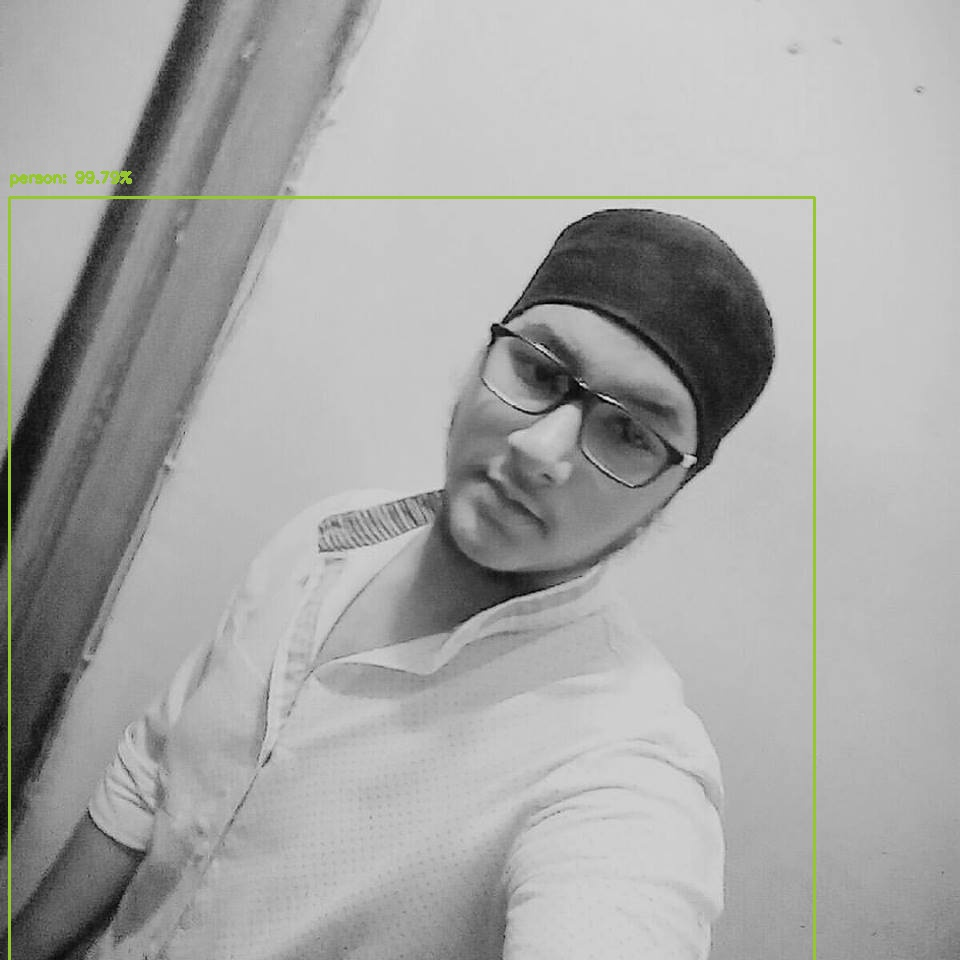

In [ ]:
image=cv2.imread('JASNEET.jpeg')
print(image.shape)
image=object_detection(image)
cv2.imwrite('Jasneet_result.jpg',image)
display(Image('Jasneet_result.jpg'))

# Applying Model on Videos(Images only)

In [ ]:
# Applying on 1st video

path = 'seq02-img-left/*.png'

all_images=np.sort(glob.glob(path))
# # print(all_images)
# calculating frame per second 
fps = FPS().start()
for i in all_images:
#     reading the images from folder
    image=cv2.imread(i,1)
#     calling function
    image=object_detection(image)
    cv2.imshow('image',image)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
        
    fps.update()
    fps.stop()
    font = cv2.FONT_HERSHEY_SIMPLEX
    # cv2.putText(image,"FPS: {:.2f}".format(fps.fps()),(20,50), font, 1,(0,255,0),2,cv2.LINE_AA)

    print("[INFO] approx. FPS: {:.2f}".format(fps.fps()))



cv2.destroyAllWindows()

[INFO] computing object detections...
[INFO] person: 60.27%
[INFO] approx. FPS: 0.23
[INFO] computing object detections...
[INFO] approx. FPS: 0.45
[INFO] computing object detections...
[INFO] approx. FPS: 0.65
[INFO] computing object detections...
[INFO] approx. FPS: 0.83
[INFO] computing object detections...
[INFO] approx. FPS: 1.01
[INFO] computing object detections...
[INFO] approx. FPS: 1.17
[INFO] computing object detections...
[INFO] approx. FPS: 1.32
[INFO] computing object detections...
[INFO] approx. FPS: 1.46
[INFO] computing object detections...
[INFO] approx. FPS: 1.60
[INFO] computing object detections...
[INFO] approx. FPS: 1.73
[INFO] computing object detections...
[INFO] approx. FPS: 1.85
[INFO] computing object detections...
[INFO] approx. FPS: 1.92
[INFO] computing object detections...
[INFO] person: 69.45%
[INFO] approx. FPS: 2.03
[INFO] computing object detections...
[INFO] approx. FPS: 2.14
[INFO] computing object detections...
[INFO] approx. FPS: 2.23
[INFO] comp

[INFO] approx. FPS: 4.77
[INFO] computing object detections...
[INFO] person: 67.59%
[INFO] approx. FPS: 4.78
[INFO] computing object detections...
[INFO] person: 62.58%
[INFO] approx. FPS: 4.79
[INFO] computing object detections...
[INFO] person: 72.35%
[INFO] person: 63.20%
[INFO] approx. FPS: 4.81
[INFO] computing object detections...
[INFO] person: 62.86%
[INFO] approx. FPS: 4.82
[INFO] computing object detections...
[INFO] person: 66.78%
[INFO] approx. FPS: 4.84
[INFO] computing object detections...
[INFO] person: 74.36%
[INFO] person: 71.45%
[INFO] person: 64.39%
[INFO] approx. FPS: 4.85
[INFO] computing object detections...
[INFO] person: 82.52%
[INFO] person: 74.40%
[INFO] approx. FPS: 4.86
[INFO] computing object detections...
[INFO] person: 98.12%
[INFO] person: 91.76%
[INFO] person: 69.06%
[INFO] approx. FPS: 4.87
[INFO] computing object detections...
[INFO] person: 99.59%
[INFO] person: 85.15%
[INFO] person: 79.79%
[INFO] approx. FPS: 4.88
[INFO] computing object detections

[INFO] person: 99.81%
[INFO] person: 98.22%
[INFO] person: 83.77%
[INFO] approx. FPS: 5.27
[INFO] computing object detections...
[INFO] person: 99.84%
[INFO] person: 99.75%
[INFO] person: 94.08%
[INFO] approx. FPS: 5.28
[INFO] computing object detections...
[INFO] person: 99.94%
[INFO] person: 92.11%
[INFO] person: 86.90%
[INFO] approx. FPS: 5.28
[INFO] computing object detections...
[INFO] person: 99.93%
[INFO] person: 95.44%
[INFO] person: 67.35%
[INFO] approx. FPS: 5.29
[INFO] computing object detections...
[INFO] person: 99.93%
[INFO] person: 77.30%
[INFO] approx. FPS: 5.29
[INFO] computing object detections...
[INFO] person: 99.76%
[INFO] person: 87.51%
[INFO] approx. FPS: 5.30
[INFO] computing object detections...
[INFO] person: 99.89%
[INFO] person: 83.53%
[INFO] person: 78.81%
[INFO] approx. FPS: 5.30
[INFO] computing object detections...
[INFO] person: 99.10%
[INFO] person: 93.43%
[INFO] person: 74.36%
[INFO] approx. FPS: 5.31
[INFO] computing object detections...
[INFO] perso